In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [64]:
df = pd.read_csv('./heart-disease-uci/heart.csv')

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [67]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

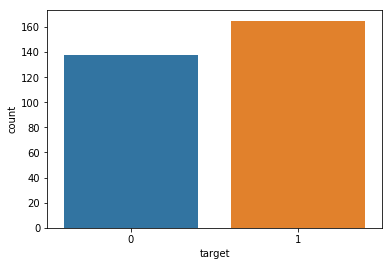

In [68]:
sns.countplot(x="target", data=df)
plt.show()

In [69]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


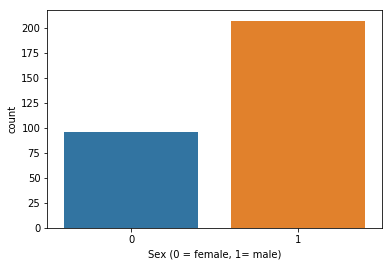

In [70]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [71]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [ ]:
Comparison Of Classification Models Accuracy:
Logistic Regression Classification
Decision Tree Classification
Random Forest Classification

In [72]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [73]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=101)

In [75]:
model = LogisticRegression()

In [76]:
model.fit(x_train, y_train)

C:\Users\HOANG TIEN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [77]:
prediction = model.predict(x_test)

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(y_test, prediction)

array([[35,  9],
       [ 6, 41]], dtype=int64)

In [80]:
report = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        44
           1       0.82      0.87      0.85        47

   micro avg       0.84      0.84      0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
# create model
dtc = DecisionTreeClassifier(random_state=101)
# fit model
dtc.fit(x_train, y_train)
# predict base on test set
prediction = dtc.predict(x_test)

# classification_report confusion_matrix
matrix = confusion_matrix(y_test, prediction)
report = classification_report(y_test, prediction)
print(matrix)
print(report)

[[30 14]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.94      0.68      0.79        44
           1       0.76      0.96      0.85        47

   micro avg       0.82      0.82      0.82        91
   macro avg       0.85      0.82      0.82        91
weighted avg       0.85      0.82      0.82        91



In [84]:
print("Accuracy: " + str(accuracy_score(y_test, prediction)))

Accuracy: 0.8241758241758241


In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
# create model
rfc = RandomForestClassifier()
# fit model
rfc.fit(x_train, y_train)
# predict base on test set
prediction = rfc.predict(x_test)
# classification_report confusion_matrix
report = classification_report(y_test, prediction)
print(matrix)
print(report)

[[30 14]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        44
           1       0.81      0.81      0.81        47

   micro avg       0.80      0.80      0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



C:\Users\HOANG TIEN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [87]:
print("Accuracy: " + str(accuracy_score(y_test, prediction)))

Accuracy: 0.8021978021978022
